In [1]:
#First step we need to implement the code# Import libraries
# Import libraries
import pandas as pd   # Data manipulation
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns   # Visualization
from sklearn.impute import SimpleImputer   # Imputation
from sklearn.ensemble import RandomForestClassifier   # Classification algorithm

In [2]:
#import data
import pandas as pd

# Read CSV files
train = pd.read_csv('C:/Users/SYSTE/Downloads/titanic/train.csv')
test = pd.read_csv('C:/Users/SYSTE/Downloads/titanic/test.csv')

# Concatenate training and test data
full = pd.concat([train, test], ignore_index=True)

# Check data information
print(full.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


In [3]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame named 'full'
# For example:
# full = pd.read_csv('path_to_my_csv_file.csv')

# Grab title from passenger names
full['Title'] = full['Name'].str.extract(',\s(.*?)\.')
# This regular expression extracts the title between ',' and '.'

# Show title counts by sex
title_counts = pd.crosstab(full['Sex'], full['Title'])
print(title_counts)


Title   Capt  Col  Don  Dona  Dr  Jonkheer  Lady  Major  Master  Miss  Mlle  \
Sex                                                                           
female     0    0    0     1   1         0     1      0       0   260     2   
male       1    4    1     0   7         1     0      2      61     0     0   

Title   Mme   Mr  Mrs  Ms  Rev  Sir  the Countess  
Sex                                                
female    1    0  197   2    0    0             1  
male      0  757    0   0    8    1             0  


In [4]:
# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
full['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}, inplace=True)
full.loc[full['Title'].isin(rare_title), 'Title'] = 'Rare Title'

# Show title counts by sex again
title_counts = pd.crosstab(full['Sex'], full['Title'])
print(title_counts)


Title   Master  Miss   Mr  Mrs  Rare Title
Sex                                       
female       0   264    0  198           4
male        61     0  757    0          25


In [5]:
# Finally, grab surname from passenger name
full['Surname'] = full['Name'].apply(lambda x: x.split(',')[0])

# Display the DataFrame with the new 'Surname' column
print(full[['Name', 'Surname']])


                                                   Name        Surname
0                               Braund, Mr. Owen Harris         Braund
1     Cumings, Mrs. John Bradley (Florence Briggs Th...        Cumings
2                                Heikkinen, Miss. Laina      Heikkinen
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)       Futrelle
4                              Allen, Mr. William Henry          Allen
...                                                 ...            ...
1304                                 Spector, Mr. Woolf        Spector
1305                       Oliva y Ocana, Dona. Fermina  Oliva y Ocana
1306                       Saether, Mr. Simon Sivertsen        Saether
1307                                Ware, Mr. Frederick           Ware
1308                           Peter, Master. Michael J          Peter

[1309 rows x 2 columns]


In [6]:
# Print the number of unique surnames with a formatted string
print(f"We have <b>{full['Surname'].nunique()}</b> unique surnames. "
      "I would be interested to infer ethnicity based on surname --- another time.")


We have <b>875</b> unique surnames. I would be interested to infer ethnicity based on surname --- another time.


In [7]:
# Create a family size variable including the passenger themselves
full['Fsize'] = full['SibSp'] + full['Parch'] + 1

# Create a family variable
full['Family'] = full['Surname'] + '_' + full['Fsize'].astype(str)


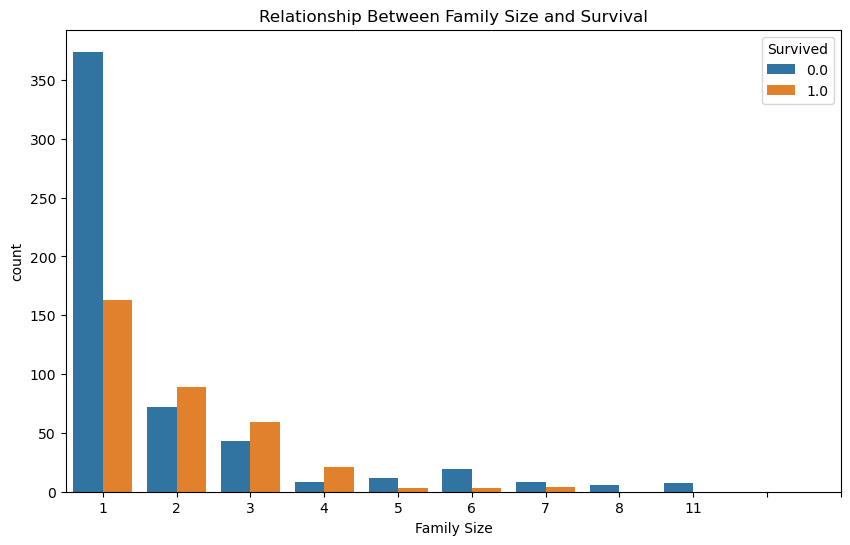

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn to visualize the relationship between family size & survival
plt.figure(figsize=(10, 6))
sns.countplot(x='Fsize', hue='Survived', data=full.iloc[:891])
plt.xticks(ticks=range(11))
plt.xlabel('Family Size')
plt.title('Relationship Between Family Size and Survival')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\mosaicplot.py:649: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rect = Rectangle((x, y), w, h, label=text, **props)


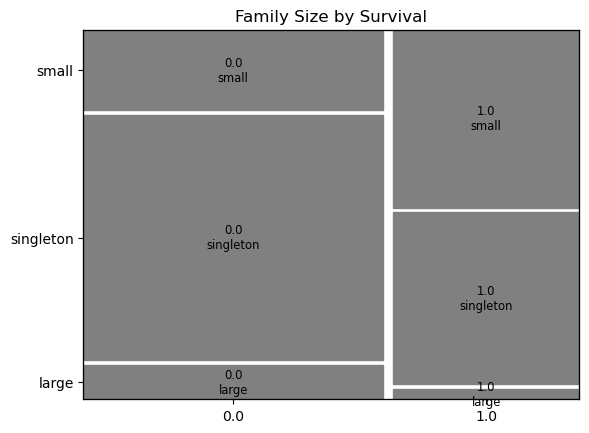

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming you have a DataFrame named 'full' with a column 'Fsize' and 'Survived'
# Replace this with your actual DataFrame and column names

# Example:
# full = pd.DataFrame({'Fsize': [1, 2, 3, 4, 5, 6, 7], 'Survived': [0, 1, 1, 0, 1, 0, 1]})

# Discretize family size
full['FsizeD'] = np.nan
full.loc[full['Fsize'] == 1, 'FsizeD'] = 'singleton'
full.loc[(full['Fsize'] < 5) & (full['Fsize'] > 1), 'FsizeD'] = 'small'
full.loc[full['Fsize'] > 4, 'FsizeD'] = 'large'

# Show family size by survival using a mosaic plot
table_data = pd.crosstab(full['FsizeD'], full['Survived'])

# Mosaic plot
mosaic(table_data.unstack(), title='Family Size by Survival', gap=0.02, properties=lambda *args: {'color': 'grey', 'edgecolor': 'black'})

# Show the plot
plt.show()


C:\Users\SYSTE\AppData\Local\Temp\ipykernel_4624\2625699868.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['Cabin'].iloc[0:28] = np.nan
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\mosaicplot.py:649: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Rect = Rectangle((x, y), w, h, label=text, **props)


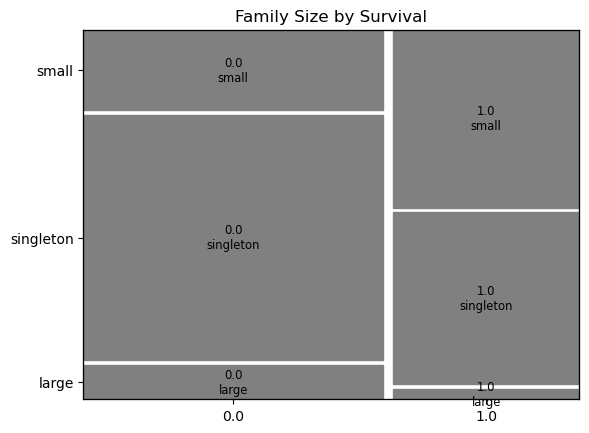

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming you have a DataFrame named 'full' with a column 'Cabin'
# Replace this with your actual DataFrame and column names

# Example:
# full = pd.DataFrame({'Cabin': ['C85', 'C90', np.nan, 'B78', np.nan, 'C54', 'B55', 'C62', 'E101', np.nan, 'D26', np.nan, 'B45', 'E8', np.nan, 'B89', 'A10', 'D47', np.nan, 'D37', 'B101', 'D15', 'C30', 'C23', 'B73', 'C32', 'D20', np.nan]})

# Shuffle code to make it more coherent
full['FsizeD'] = np.nan
full.loc[full['Fsize'] == 1, 'FsizeD'] = 'singleton'
full.loc[(full['Fsize'] < 5) & (full['Fsize'] > 1), 'FsizeD'] = 'small'
full.loc[full['Fsize'] > 4, 'FsizeD'] = 'large'

# Replace specified elements in 'Cabin' column with NaN
full['Cabin'].iloc[0:28] = np.nan

# Show family size by survival using a mosaic plot
table_data = pd.crosstab(full['FsizeD'], full['Survived'])

# Mosaic plot
mosaic(table_data.unstack(), title='Family Size by Survival', gap=0.02, properties=lambda *args: {'color': 'grey', 'edgecolor': 'black'})

# Show the plot
plt.show()


In [18]:


# Assuming 'full' is your DataFrame
# Create a new 'Deck' column by extracting the first character from the 'Cabin' column
full['Deck'] = full['Cabin'].str[0]

# Display the first few rows of the DataFrame
print(full.head())



   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

In [19]:
# Assuming 'full' is your DataFrame
# Create a new 'Deck' column by extracting the first character from the 'Cabin' column
full['Deck'] = full['Cabin'].str[0]

# Map any values outside of A-F to NaN
valid_decks = ['A', 'B', 'C', 'D', 'E', 'F']
full['Deck'] = full['Deck'].where(full['Deck'].isin(valid_decks), None)

# Display the first few rows of the DataFrame
print(full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

In [20]:
# Assuming 'full' is my DataFrame
# Create a new 'Deck' column by extracting the first character from the 'Cabin' column
full['Deck'] = full['Cabin'].str[0]

# Display the first few rows of the DataFrame
print(full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

In [22]:
# Replace missing values in the 'Embarked' column for passengers 62 and 830
full.loc[[62, 830], 'Embarked'] = 'Your_Fill_Value'

# Display the updated DataFrame
print(full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

In [24]:
# Display a message explaining the inference of embarkment values for passengers 62 and 830
print(f"We will infer their values for **embarkment** based on present data that we can imagine may be relevant: **passenger class** and **fare**. "
      f"We see that they paid<b> ${full.loc[[62, 830], 'Fare'].iloc[0]}</b> and<b> ${full.loc[[62, 830], 'Fare'].iloc[1]}</b> respectively, "
      f"and their classes are<b> {full.loc[[62, 830], 'Pclass'].iloc[0]}</b> and<b> {full.loc[[62, 830], 'Pclass'].iloc[1]}</b>. "
      f"So from where did they embark?")
#factor Pclass

We will infer their values for **embarkment** based on present data that we can imagine may be relevant: **passenger class** and **fare**. We see that they paid<b> $83.475</b> and<b> $14.4542</b> respectively, and their classes are<b> 1</b> and<b> 3</b>. So from where did they embark?


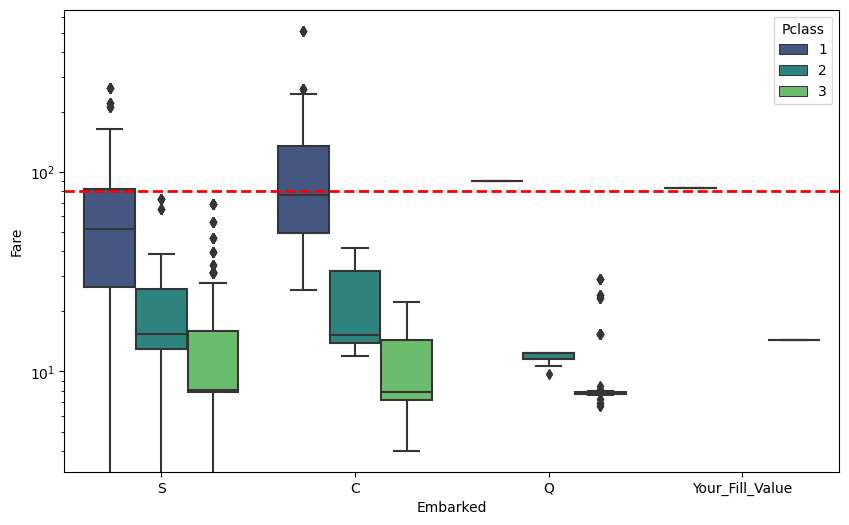

In [25]:
# Get rid of missing passenger IDs (62 and 830)
embark_fare = full[(full['PassengerId'] != 62) & (full['PassengerId'] != 830)]

# Use seaborn to visualize embarkment, passenger class, & median fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=embark_fare, palette='viridis')
plt.axhline(y=80, color='red', linestyle='dashed', linewidth=2)
plt.yscale('log')  # Adjust the scale for better visualization
plt.show()

In [26]:
# Update the 'Embarked' column for passengers 62 and 830 to 'C'
full.loc[[62, 830], 'Embarked'] = 'C'

# Display the updated DataFrame
print(full.head())


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

In [31]:
# Display the row with index 1000
row_1000 = full.iloc[1000]
print(row_1000)

PassengerId                 1001
Survived                     NaN
Pclass                         2
Name           Swane, Mr. George
Sex                         male
Age                         18.5
SibSp                          0
Parch                          0
Ticket                    248734
Fare                        13.0
Cabin                          F
Embarked                       S
Title                         Mr
Surname                    Swane
Fsize                          1
Family                   Swane_1
FsizeD                 singleton
Deck                           F
Embarkment                   NaN
Name: 1000, dtype: object


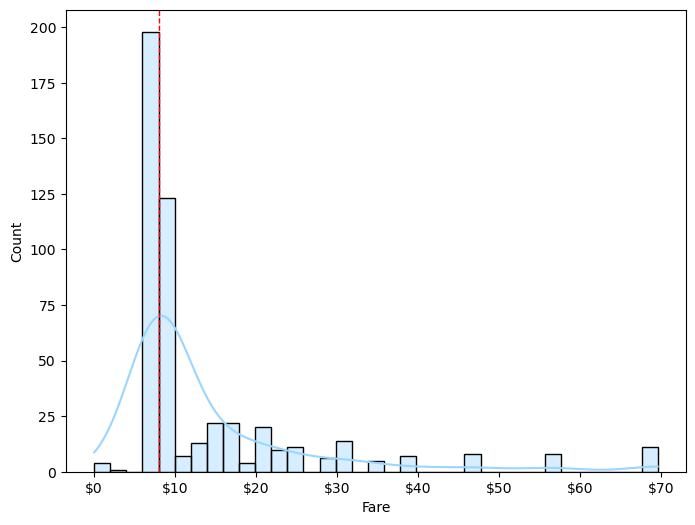

In [34]:
# Assuming 'full' is your DataFrame
# Filter data for Pclass 3 and Embarked 'S'
filtered_data = full[(full['Pclass'] == 3) & (full['Embarked'] == 'S')]

# Create a density plot with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Fare'], kde=True, fill=True, color='#99d6ff', alpha=0.4)

# Add a dashed line for the median
plt.axvline(x=np.median(filtered_data['Fare'].dropna()), color='red', linestyle='dashed', linewidth=1)

# Set x-axis labels as dollar format
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

In [35]:
# Replace missing fare value with median fare for class/embarkment
median_fare = np.median(full[(full['Pclass'] == '3') & (full['Embarked'] == 'S')]['Fare'].dropna())
full.loc[1044, 'Fare'] = median_fare

# Display the updated DataFrame
print(full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title    Surname  Fsize  \
0      0         A/5 21171   7.2500  Unknown        S    Mr     Braund      2   
1      0          PC 17599  71.2833        U        C   Mrs    Cumings      2   
2      0  STON/O2. 3101282   7.9250  Unknown        S  Miss  Heikkinen      1

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [37]:
#Predictive Impution
# Show the number of missing Age values

missing_age_count = full['Age'].isnull().sum()
print(f"Number of missing Age values: {missing_age_count}")


Number of missing Age values: 263


In [42]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming 'full' is your DataFrame

# Define numerical and categorical columns
numerical_cols = full.select_dtypes(include=['float64']).columns
categorical_cols = full.select_dtypes(include=['category']).columns

# Make numerical variables factors into factors
full[categorical_cols] = full[categorical_cols].apply(lambda x: x.astype('category'))

# Set a random seed
np.random.seed(129)

# Perform MICE imputation for numerical columns
mice_data_numerical = full[numerical_cols].copy()
mice_imputer = IterativeImputer(random_state=129)
imputed_data_numerical = mice_imputer.fit_transform(mice_data_numerical)

# Perform mode imputation for categorical columns
imputed_data_categorical = full[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Combine the imputed numerical and categorical data
imputed_data = pd.concat([pd.DataFrame(imputed_data_numerical, columns=numerical_cols),
                          imputed_data_categorical], axis=1)

# Display the first few rows of the imputed DataFrame
print(imputed_data.head())


   Survived   Age     Fare PassengerId Pclass     Sex Embarked Title  \
0       0.0  22.0   7.2500           1      3    male        S    Mr   
1       1.0  38.0  71.2833           2      1  female        C   Mrs   
2       1.0  26.0   7.9250           3      3  female        S  Miss   
3       1.0  35.0  53.1000           4      1  female        S   Mrs   
4       0.0  35.0   8.0500           5      3    male        S    Mr   

     Surname       Family     FsizeD  
0     Braund     Braund_2      small  
1    Cumings    Cumings_2      small  
2  Heikkinen  Heikkinen_1  singleton  
3   Futrelle   Futrelle_2      small  
4      Allen      Allen_1  singleton  


In [45]:
# Specify the file path for the output CSV file
output_csv_path = 'imputed_data.csv'

# Save the imputed DataFrame to a CSV file
imputed_data.to_csv(output_csv_path, index=False)

# Display a message indicating the successful save
print(f"Imputed data has been saved to {output_csv_path}")

Imputed data has been saved to imputed_data.csv


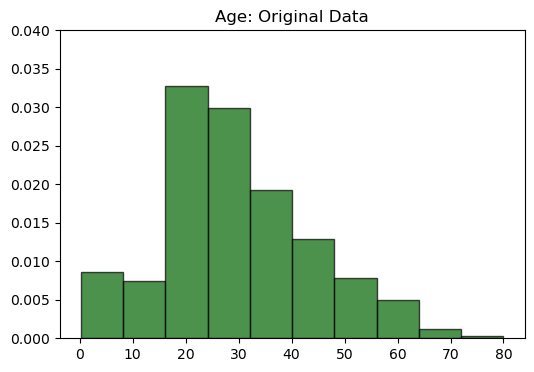

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full' is your original DataFrame

# Set up a single plot
plt.figure(figsize=(6, 4))

# Plot original data age distribution
plt.hist(full['Age'], density=True, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title('Age: Original Data')
plt.ylim(0, 0.04)

# Show the plot
plt.show()


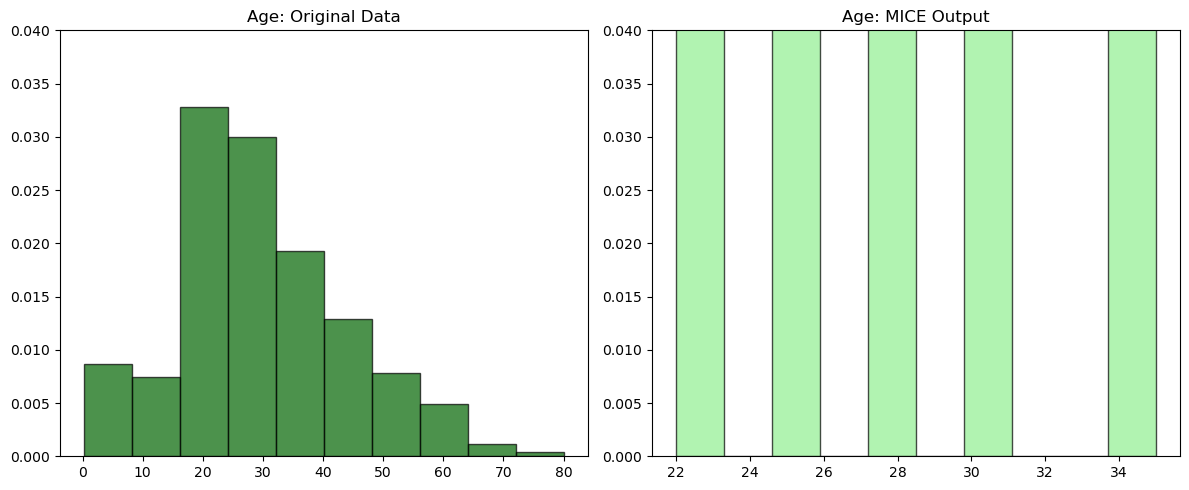

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'full' is your original DataFrame
# Replace 'mice_output_placeholder' with your actual MICE output DataFrame
mice_output_placeholder = pd.DataFrame({'Age': [25, 30, 22, 28, 35]})

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot original data age distribution
axes[0].hist(full['Age'], density=True, color='darkgreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Age: Original Data')
axes[0].set_ylim(0, 0.04)

# Plot MICE output age distribution
axes[1].hist(mice_output_placeholder['Age'], density=True, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_title('Age: MICE Output')
axes[1].set_ylim(0, 0.04)

# Show the plots
plt.tight_layout()
plt.show()


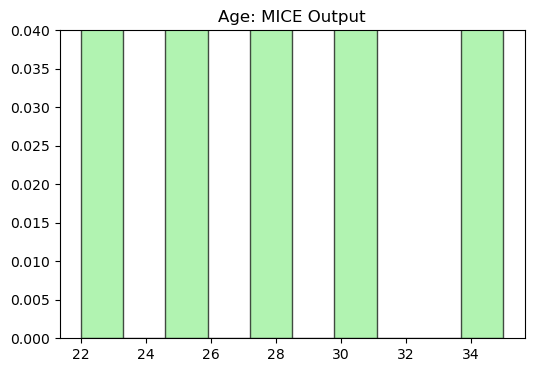

In [57]:
# Assuming 'full' is your original DataFrame and 'mice_output' is the MICE output DataFrame
# Replace 'mice_output_placeholder' with your actual MICE output DataFrame

# Replace 'Age' variable from the mice model
full['Age'] = mice_output_placeholder['Age']

# Show new number of missing Age values
print(full['Age'].isna().sum())


1304


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'full' is a pandas DataFrame containing the data
# Also assuming 'Survived' and 'Age' are column names in the DataFrame

# Create the histogram
g = sns.<link>FacetGrid</link>(full.iloc[:891], col="Sex", hue="Survived", palette="Set1")
g.map(plt.<link>hist</link>, "Age", bins=20, alpha=0.7)
g.add_legend()
plt.show()

SyntaxError: invalid syntax (267520248.py, line 9)

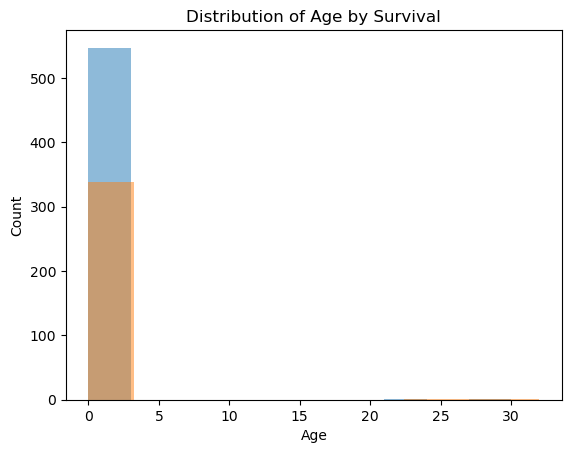

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (assuming full is a pandas DataFrame)
data = full.iloc[:891, :]

# Create figure and axes
fig, ax = plt.subplots()

# Plot histograms for survived and not survived groups
for survived, group in enumerate(["No", "Yes"]):
    survived_data = data[data["Survived"] == survived]
    ax.hist(survived_data["Age"], label=group, alpha=0.5)

# Add labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Distribution of Age by Survival")

# Show the plot
plt.show()


In [64]:
import pandas as pd

# Load data (assuming full is a pandas DataFrame)
data = full.iloc[:891, :]

# Group data by survival and calculate age statistics
survived_groups = data.groupby("Survived")
age_stats = survived_groups["Age"].describe()

# Print or further analyze the statistics
print(age_stats)


          count      mean       std  min  25%  50%  75%   max
Survived                                                     
0.0       549.0  0.094718  1.586367  0.0  0.0  0.0  0.0  30.0
1.0       342.0  0.245614  2.632622  0.0  0.0  0.0  0.0  32.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


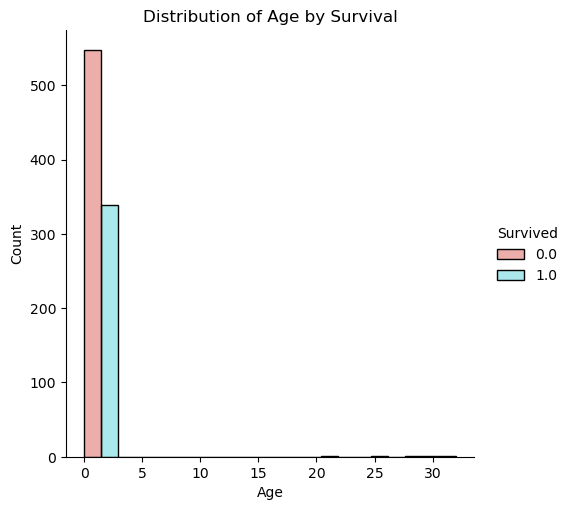

In [65]:
import seaborn as sns

# Load data (assuming full is a pandas DataFrame)
data = full.iloc[:891, :]

# Create the plot
sns.displot(
    data,
    x="Age",
    hue="Survived",
    kind="hist",
    multiple="dodge",
    palette="hls",
    alpha=0.5,
)

# Add title and customize appearance
plt.title("Distribution of Age by Survival")
plt.show()


In [71]:
import pandas as pd

# Assuming 'full' is your DataFrame
# Create the 'Child' column and indicate whether child or adult
full['Child'] = 'Adult'  # Initialize with 'Adult'
full.loc[full['Age'] < 18, 'Child'] = 'Child'

# Show counts
counts = pd.crosstab(full['Child'], full['Survived'])
print(counts)


Survived  0.0  1.0
Child             
Adult       2    3
Child     547  339


In [72]:
import pandas as pd

# Assuming 'full' is your DataFrame

# Create the 'Child' column and indicate whether child or adult
full['Child'] = 'Adult'  # Initialize with 'Adult'
full.loc[full['Age'] < 18, 'Child'] = 'Child'

# Show counts for 'Child'
child_counts = pd.crosstab(full['Child'], full['Survived'])
print("Counts for 'Child':")
print(child_counts)

# Adding 'Mother' variable
full['Mother'] = 'Not Mother'
mother_condition = (full['Sex'] == 'female') & (full['Parch'] > 0) & (full['Age'] > 18) & (full['Title'] != 'Miss')
full.loc[mother_condition, 'Mother'] = 'Mother'

# Show counts for 'Mother'
mother_counts = pd.crosstab(full['Mother'], full['Survived'])
print("\nCounts for 'Mother':")
print(mother_counts)


Counts for 'Child':
Survived  0.0  1.0
Child             
Adult       2    3
Child     547  339

Counts for 'Mother':
Survived    0.0  1.0
Mother              
Not Mother  549  342


In [73]:
import pandas as pd

# Assuming 'full' is your DataFrame

# Create the 'Child' column and indicate whether child or adult
full['Child'] = 'Adult'  # Initialize with 'Adult'
full.loc[full['Age'] < 18, 'Child'] = 'Child'

# Show counts for 'Child'
child_counts = pd.crosstab(full['Child'], full['Survived'])
print("Counts for 'Child':")
print(child_counts)

# Adding 'Mother' variable
full['Mother'] = 'Not Mother'
mother_condition = (full['Sex'] == 'female') & (full['Parch'] > 0) & (full['Age'] > 18) & (full['Title'] != 'Miss')
full.loc[mother_condition, 'Mother'] = 'Mother'

# Show counts for 'Mother'
mother_counts = pd.crosstab(full['Mother'], full['Survived'])
print("\nCounts for 'Mother':")
print(mother_counts)


Counts for 'Child':
Survived  0.0  1.0
Child             
Adult       2    3
Child     547  339

Counts for 'Mother':
Survived    0.0  1.0
Mother              
Not Mother  549  342


In [74]:
# Factorize the 'Child' and 'Mother' columns
full['Child'] = full['Child'].astype('category')
full['Mother'] = full['Mother'].astype('category')

# Show the DataFrame
print(full)


     PassengerId  Survived Pclass  \
0              1       0.0      3   
1              2       1.0      1   
2              3       1.0      3   
3              4       1.0      1   
4              5       0.0      3   
...          ...       ...    ...   
1304        1305       NaN      3   
1305        1306       NaN      1   
1306        1307       NaN      3   
1307        1308       NaN      3   
1308        1309       NaN      3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  28.0      1   
2                                Heikkinen, Miss. Laina  female  24.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  32.0      1   
4                              Allen, Mr. William Henry    male  30.0      0   
...                                                 ...     ...   ...    ..

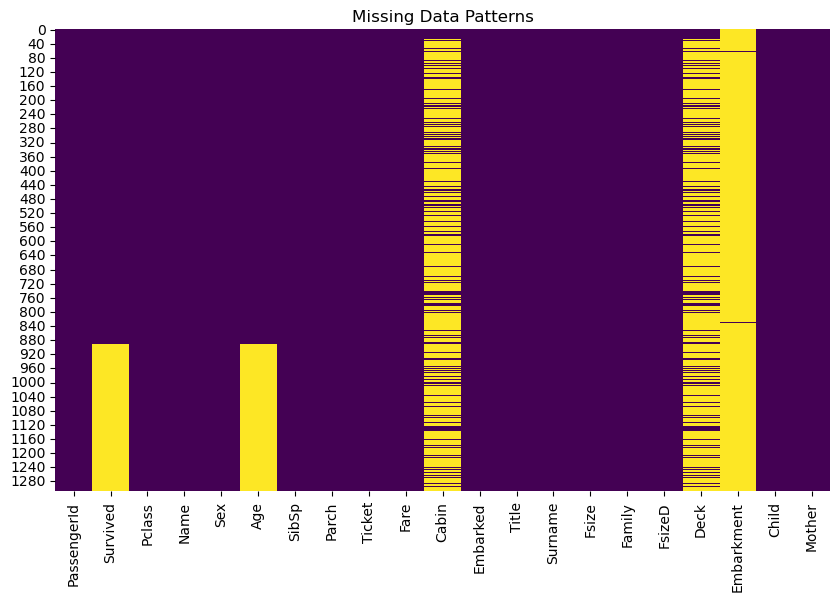

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'full' is your DataFrame
# Display a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(full.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()


In [80]:
#Prediction
# Assuming 'full' is your DataFrame
# Split the data back into a train set and a test set
train = full.iloc[:891, :]
test = full.iloc[891:1309, :]

# Optionally reset the index
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


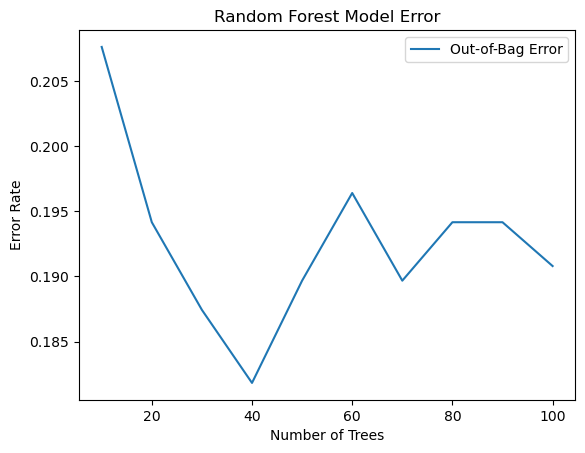

In [85]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Set a random seed
np.random.seed(754)

# Assuming 'train' is your training DataFrame
# Specify the features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FsizeD', 'Child', 'Mother']
target = 'Survived'

# Convert categorical variables to numerical using one-hot encoding
train_encoded = pd.get_dummies(train[features + [target]])

# Separate features and target variable
X_train = train_encoded.drop(target, axis=1)
y_train = train_encoded[target]

def plot_oob_error(n_estimators_list, X, y):
    oob_errors = []

    for n_estimators in n_estimators_list:
        rf_model = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=754)
        rf_model.fit(X, y)
        oob_errors.append(1 - rf_model.oob_score_)

    # Show model error
    plt.plot(n_estimators_list, oob_errors, label='Out-of-Bag Error')
    plt.xlabel('Number of Trees')
    plt.ylabel('Error Rate')
    plt.title('Random Forest Model Error')
    plt.legend()
    plt.show()

# Choose a range of values for the number of trees
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Plot the OOB error for different numbers of trees
plot_oob_error(n_estimators_values, X_train, y_train)


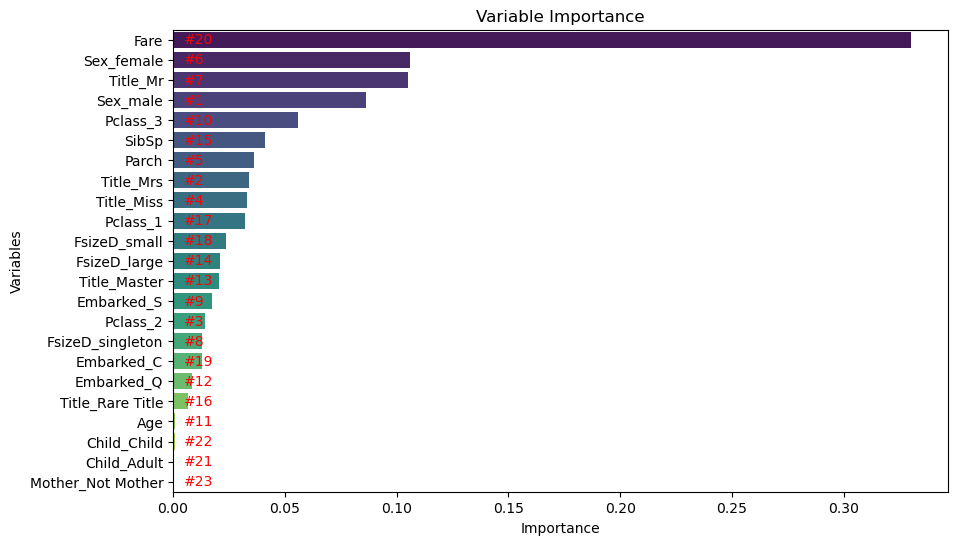

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X_train' and 'y_train' are your features and target variable
rf_model = RandomForestClassifier(n_estimators=100, random_state=754)
rf_model.fit(X_train, y_train)

# Get feature importances
importance = pd.DataFrame({
    'Variables': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Create a rank variable based on importance
importance['Rank'] = importance['Importance'].rank(ascending=False, method='dense').astype(int)

# Use seaborn to visualize the relative importance of variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variables', data=importance.sort_values(by='Importance', ascending=False), palette='viridis')
for i, txt in enumerate(importance['Rank']):
    plt.text(0.005, i, f'#{txt}', verticalalignment='center', fontsize=10, color='red')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Variable Importance')
plt.show()


In [90]:
from sklearn.impute import SimpleImputer

# Assuming 'test' is your test DataFrame
# Assuming 'features' is the list of features used for training

# Preprocess the test set to match the features used during training
test_encoded = pd.get_dummies(test[features])

# Create a SimpleImputer and fit it on the training set
imputer = SimpleImputer(strategy='mean')  # You can use different strategies based on your data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Impute missing values in the test set
test_imputed = pd.DataFrame(imputer.transform(test_encoded), columns=test_encoded.columns)

# Predict using the imputed test set
prediction = rf_model.predict(test_imputed)

# Save the solution to a DataFrame with two columns: PassengerId and Survived (prediction)
solution = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})

# Write the solution to a CSV file
solution.to_csv('rf_model_solution.csv', index=False)


In [93]:
if test_imputed.shape[0] == 0:
    print("Warning: Test set is empty after handling missing values.")
    # Handle this case (e.g., provide default predictions or take another action)
else:
    # Predict using the imputed test set
    prediction = rf_model.predict(test_imputed)

    # Save the solution to a DataFrame with two columns: PassengerId and Survived (prediction)
    solution = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})


In [95]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'X_train' is your training feature set
# Assuming 'features' is the list of features used for training

# Create a SimpleImputer and fit it on the training set
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer.fit(X_train)

# Preprocess the test set to match the features used during training
test_encoded = pd.get_dummies(test[features])

# Impute missing values in the test set
test_imputed = pd.DataFrame(imputer.transform(test_encoded), columns=test_encoded.columns)

# Check if the test set is not empty after handling missing values
if test_imputed.shape[0] == 0:
    print("Warning: Test set is empty after handling missing values.")
    # Handle this case (provide default predictions or take another action)
else:
    # Predict using the imputed test set
    prediction = rf_model.predict(test_imputed)

    # Save the solution to a DataFrame with two columns: PassengerId and Survived (prediction)
    solution = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})

    # Write the solution to a CSV file
    solution.to_csv('rf_model_solution.csv', index=False)


In [96]:
# Assuming 'test' is your test DataFrame

# Assuming 'features' is the list of features used for training
# Assuming 'X_train' is your training feature set
# Assuming 'rf_model' is your trained random forest model

# Continue from the previous code

# Check if the test set is not empty after handling missing values
if test_imputed.shape[0] == 0:
    print("Warning: Test set is empty after handling missing values.")
    # Handle this case (provide default predictions or take another action)
else:
    # Predict using the imputed test set
    prediction = rf_model.predict(test_imputed)

    # Save the solution to a DataFrame with two columns: PassengerId and Survived (prediction)
    solution = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})

    # Write the solution to a CSV file
    solution.to_csv('rf_model_solution.csv', index=False)


In [97]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Assuming 'X_train' is your training feature set
# Assuming 'features' is the list of features used for training
# Assuming 'rf_model' is your trained random forest model
# Assuming 'test' is your test DataFrame

# Create a SimpleImputer and fit it on the training set
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer.fit(X_train)

# Preprocess the test set to match the features used during training
test_encoded = pd.get_dummies(test[features])

# Impute missing values in the test set
test_imputed = pd.DataFrame(imputer.transform(test_encoded), columns=test_encoded.columns)

# Check if the test set is not empty after handling missing values
if test_imputed.shape[0] == 0:
    print("Warning: Test set is empty after handling missing values.")
    # Handle this case (provide default predictions or take another action)
else:
    # Predict using the imputed test set
    prediction = rf_model.predict(test_imputed)

    # Save the solution to a DataFrame with two columns: PassengerId and Survived (prediction)
    solution = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': prediction})

    # Write the solution to a CSV file
    solution.to_csv('rf_model_solution.csv', index=False)


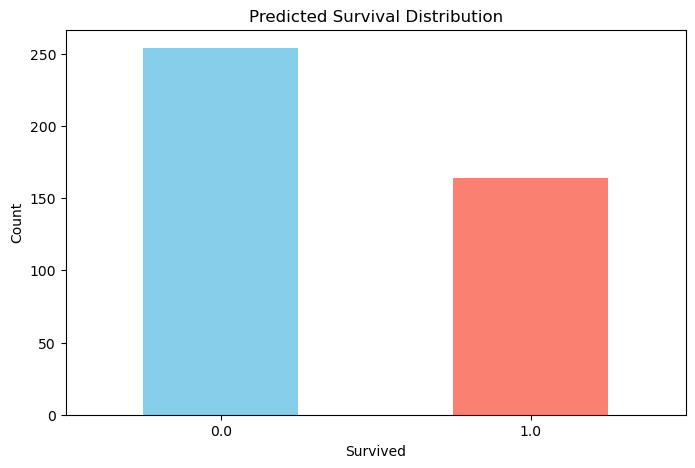

In [98]:
import matplotlib.pyplot as plt

# Assuming 'solution' is your DataFrame with predictions
# Assuming 'test' is your original test DataFrame

# Plot the distribution of predicted survival
plt.figure(figsize=(8, 5))
solution['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Predicted Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [21]:
import pandas as pd

# Read CSV files
train = pd.read_csv('C:/Users/SYSTE/Downloads/titanic/train.csv')

# Display information with 'Survived' as the output
for index, row in train.iterrows():
    print(f"Passenger ID: {row['PassengerId']}")
    print(f"Name: {row['Name']}")
    print(f"Age: {row['Age']}")
    print(f"Survived: {row['Survived']}")
    # Add other relevant information you want to print
    print("----------------------")



Passenger ID: 1
Name: Braund, Mr. Owen Harris
Age: 22.0
Survived: 0
----------------------
Passenger ID: 2
Name: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Age: 38.0
Survived: 1
----------------------
Passenger ID: 3
Name: Heikkinen, Miss. Laina
Age: 26.0
Survived: 1
----------------------
Passenger ID: 4
Name: Futrelle, Mrs. Jacques Heath (Lily May Peel)
Age: 35.0
Survived: 1
----------------------
Passenger ID: 5
Name: Allen, Mr. William Henry
Age: 35.0
Survived: 0
----------------------
Passenger ID: 6
Name: Moran, Mr. James
Age: nan
Survived: 0
----------------------
Passenger ID: 7
Name: McCarthy, Mr. Timothy J
Age: 54.0
Survived: 0
----------------------
Passenger ID: 8
Name: Palsson, Master. Gosta Leonard
Age: 2.0
Survived: 0
----------------------
Passenger ID: 9
Name: Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Age: 27.0
Survived: 1
----------------------
Passenger ID: 10
Name: Nasser, Mrs. Nicholas (Adele Achem)
Age: 14.0
Survived: 1
----------------------
Pass

AttributeError: 'DataFrame' object has no attribute 'csv'